In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: PB
Digite os 2 primeiros digitos do shapefile: 25


# Importando o shapefile

In [16]:
gdf = gpd.read_file('Shapes/PB/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 14 columns):
ID            5574 non-null int64
CD_GEOCODI    5574 non-null object
TIPO          5574 non-null object
CD_GEOCODB    1684 non-null object
NM_BAIRRO     1684 non-null object
CD_GEOCODS    5574 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    5574 non-null object
NM_DISTRIT    5574 non-null object
CD_GEOCODM    5574 non-null object
NM_MUNICIP    5574 non-null object
NM_MICRO      5574 non-null object
NM_MESO       5574 non-null object
geometry      5574 non-null object
dtypes: int64(1), object(13)
memory usage: 609.7+ KB


In [17]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [18]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [19]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(5548, 13)

In [20]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,250010605000001,434.0,1526.0,"3,52","3,51","429,85","111252,48","483,3","99222,43","246,75","100238,62",428,"96289,84"
1,250010605000002,148.0,500.0,"3,38","3,38","691,12","450037,2","752,1","443836,54","414,29","367613,48","651,03","423758,93"
2,250010605000003,295.0,889.0,"3,01","2,16","683,62","325739,66","749,7","307619,96","411,84","266795,31","642,43","268039,82"
3,250010605000004,217.0,860.0,"3,96","4,42","313,13","82998,84","416,87","67152,99","204,14","77711,06","380,3","77776,7"
4,250010605000005,199.0,667.0,"3,35","3,07","437,2","212340,79","517,88","209728,12","263,71","140484,01","439,25","156943,31"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [21]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [22]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [23]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5548 entries, 0 to 5547
Data columns (total 26 columns):
ID            5548 non-null int64
CD_GEOCODI    5548 non-null int64
TIPO          5548 non-null object
CD_GEOCODB    1672 non-null object
NM_BAIRRO     1672 non-null object
CD_GEOCODS    5548 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    5548 non-null object
NM_DISTRIT    5548 non-null object
CD_GEOCODM    5548 non-null object
NM_MUNICIP    5548 non-null object
NM_MICRO      5548 non-null object
NM_MESO       5548 non-null object
geometry      5548 non-null object
V001          5537 non-null float64
V002          5537 non-null float64
V003          5537 non-null object
V004          5537 non-null object
V005          5537 non-null object
V006          5537 non-null object
V007          5537 non-null object
V008          5537 non-null object
V009          5548 non-null object
V010          5548 non-null object
V011          5546 non-null object
V012         

In [24]:
del gdf
del dados

Text(0.5,1,'PB')

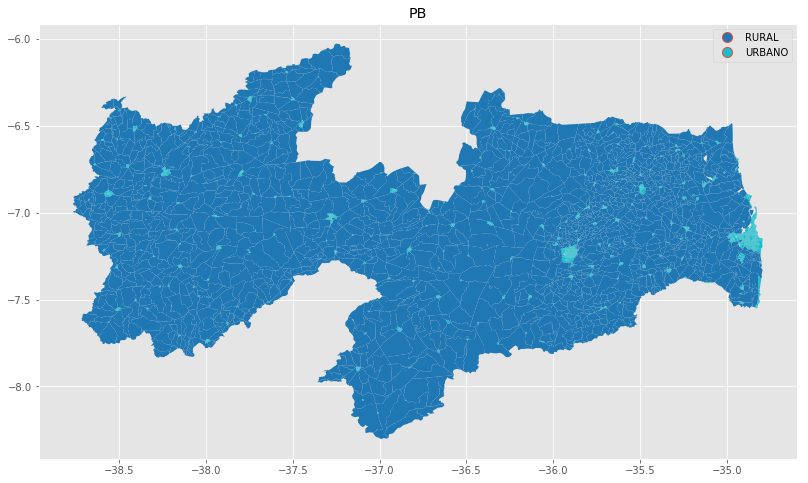

In [25]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [26]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [27]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [28]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [29]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [30]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
155,Montadas,PB,0.659,2509503.0,POLYGON ((-35.96675810986274 -7.08346340945059...,0.658654
1078,Arara,PB,1.878,2500908.0,POLYGON ((-35.75650006153587 -6.82530977806106...,1.878030
1159,Araruna,PB,2.111,2501005.0,POLYGON ((-35.73853888653158 -6.52453426415045...,2.111459
1212,SÃ£o JosÃ© dos Ramos,PB,1.159,2514453.0,POLYGON ((-35.37962452390678 -7.25133344761145...,1.158525
2369,Matinhas,PB,0.290,2509339.0,POLYGON ((-35.7702716603992 -7.124716168597779...,0.289537


In [31]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 223 entries, 155 to 3009
Data columns (total 6 columns):
Municipio     223 non-null object
UF            223 non-null object
Area_Urb      223 non-null float64
CD_GEOCODM    223 non-null int64
geometry      223 non-null object
Area          223 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 12.2+ KB


In [32]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no PB')

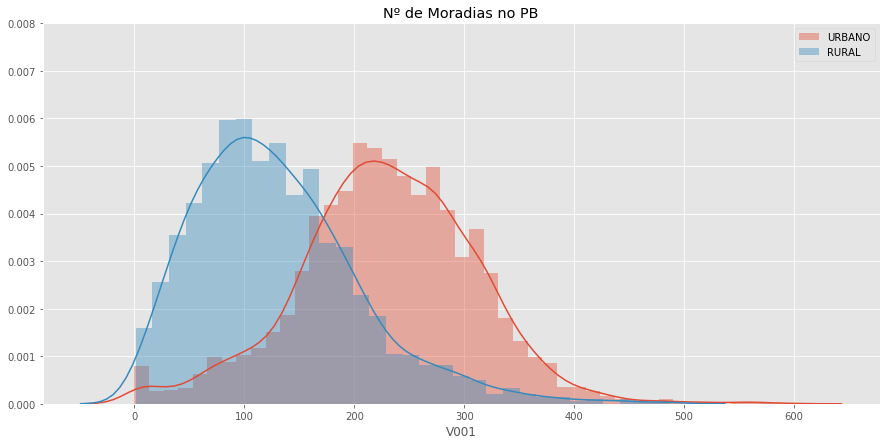

In [34]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [35]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    1934.000000
mean      129.736815
std        75.711418
min         1.000000
25%        75.000000
50%       119.500000
75%       171.000000
max       487.000000
Name: V001, dtype: float64
URBANO 
 count    3614.000000
mean      229.596292
std        80.979446
min         0.000000
25%       180.000000
50%       230.000000
75%       282.000000
max       596.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

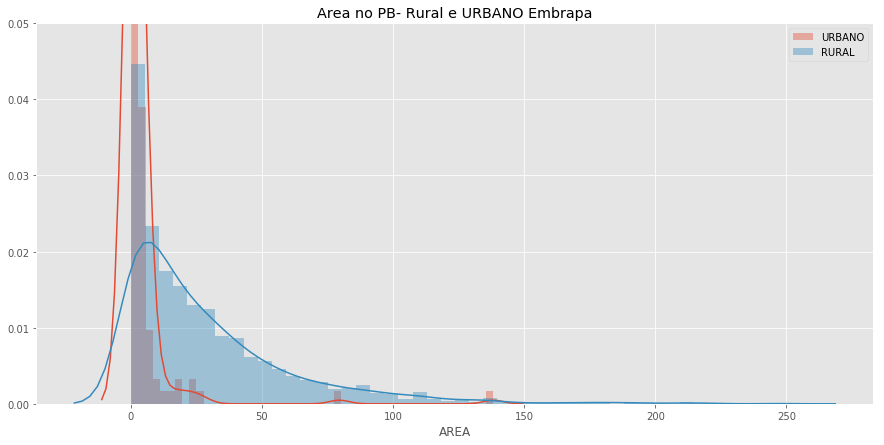

In [37]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [38]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

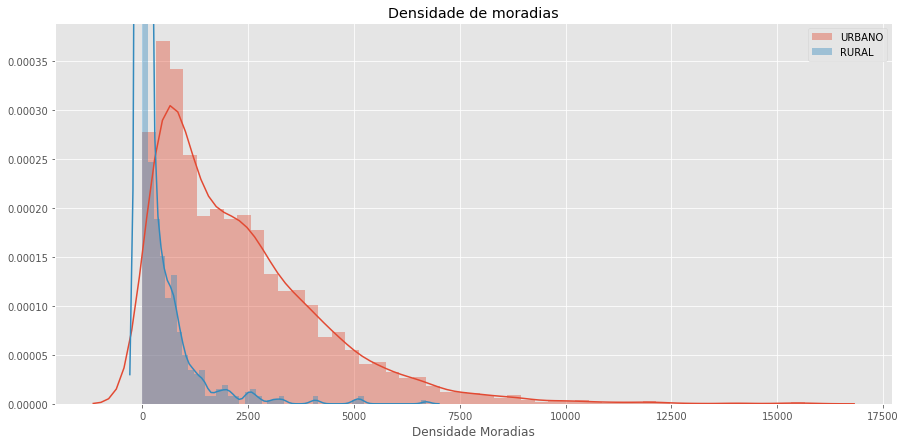

In [39]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [40]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    1934.000000
mean      137.377203
std       453.315476
min         0.034438
25%         2.732381
50%         6.234389
75%        18.812771
max      6705.506668
Name: Densidade Moradias, dtype: float64
URBANO 
 count     3614.000000
mean      2292.739990
std       1997.355516
min          0.000000
25%        777.551629
50%       1825.261891
75%       3234.890352
max      15653.625385
Name: Densidade Moradias, dtype: float64


In [41]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000
mean,36034.595745,2.509249e+14,150.404255,536.085106,0.110611,1712.213163
std,1875.581884,5.418631e+11,91.943334,325.829121,0.088366,1100.917003
min,32875.000000,2.500106e+14,15.000000,45.000000,0.004252,818.477128
25%,34687.250000,2.505256e+14,86.000000,302.000000,0.053467,977.601550
50%,36604.000000,2.509909e+14,140.500000,492.500000,0.093507,1294.479241
75%,37660.500000,2.513703e+14,188.500000,661.000000,0.136150,2004.314685
max,38366.000000,2.517001e+14,447.000000,1659.000000,0.511755,6705.506668


## Descrição da área por setor censitários urbanos e rurais

In [42]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    223.000000
mean       3.093157
std       11.088388
min        0.155187
25%        0.598830
50%        0.886528
75%        2.263919
max      138.252307
Name: Area, dtype: float64
RURAL 
 count    1934.000000
mean       28.681458
std        32.617913
min         0.003304
25%         5.875044
50%        18.490469
75%        39.841549
max       247.117093
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

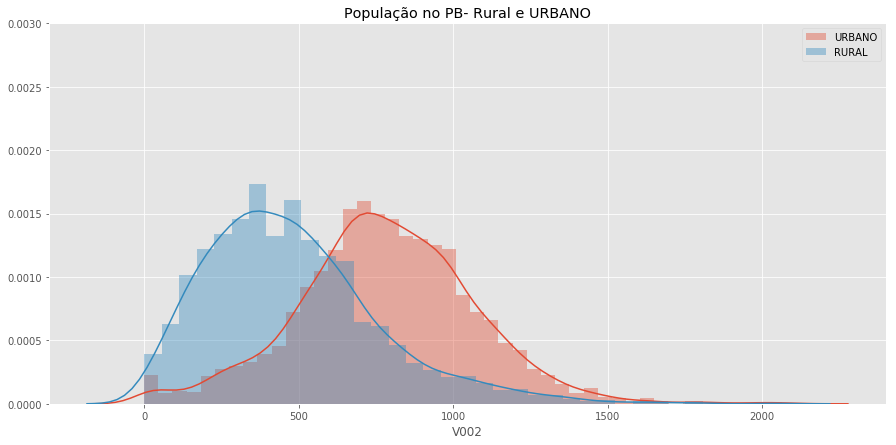

In [44]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [45]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    1934.000000
mean      478.700103
std       280.922405
min         1.000000
25%       277.000000
50%       442.000000
75%       629.000000
max      2033.000000
Name: V002, dtype: float64
URBANO 
 count    3614.000000
mean      782.254842
std       286.971529
min         0.000000
25%       610.000000
50%       776.500000
75%       964.000000
max      2110.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [46]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [47]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [48]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000
mean,33200.500000,2.501253e+14,288.000000,983.250000,0.125661,2317.835964
std,486.554211,1.705756e+11,40.108187,128.206539,0.021710,310.832098
min,32925.000000,2.500304e+14,257.000000,828.000000,0.100753,1940.276886
25%,32925.750000,2.500304e+14,257.750000,906.750000,0.113668,2125.277037
50%,32975.000000,2.500453e+14,276.500000,995.500000,0.124925,2368.867861
75%,33249.750000,2.501402e+14,306.750000,1072.000000,0.136918,2561.426788
max,33927.000000,2.503803e+14,342.000000,1114.000000,0.152040,2593.331249


Text(0.5,1,'SCRCU - Por Município')

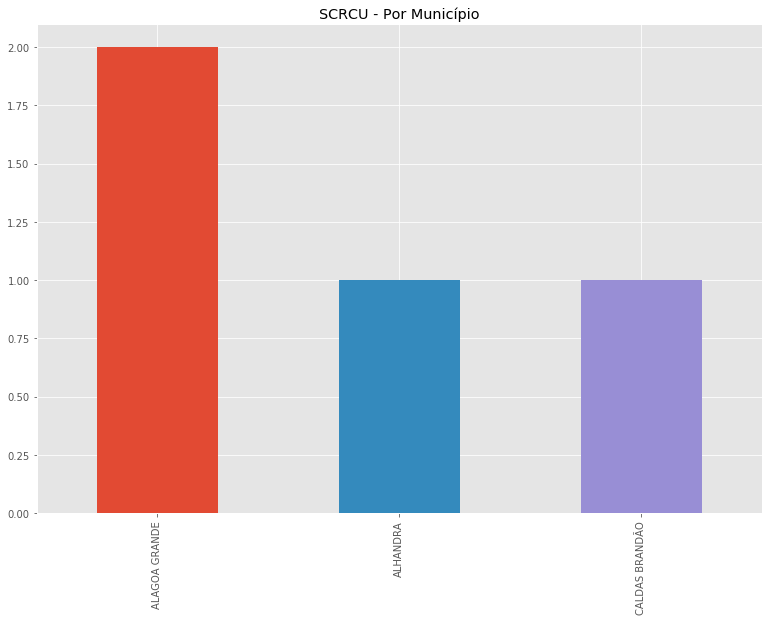

In [49]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


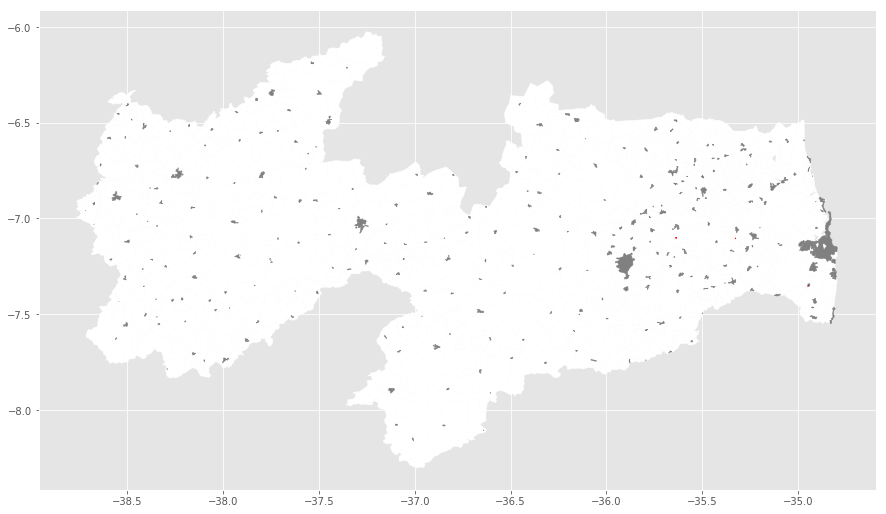

In [50]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [51]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [52]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [53]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [55]:
regioes_urbanas_df.head()

,geometry,FONTE
54,"POLYGON ((-35.6359333224965 -7.09830112567384,...",1.0
55,"POLYGON ((-35.6358899829935 -7.09832155335202,...",1.0
153,POLYGON ((-34.94439911741929 -7.35225819239492...,1.0
1085,POLYGON ((-35.3283225419481 -7.104453834215279...,1.0
155,POLYGON ((-35.96675810986274 -7.08346340945059...,0.0


In [56]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [57]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [60]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)

In [196]:
mplleaflet.show(fig=f,crs=regioes_urbanas_rj.crs)